In [1]:
!pip install split-folders


In [ ]:
import splitfolders  # or import split_folders

input_folder = '/content/drive/MyDrive/soyabean'

In [ ]:
splitfolders.ratio(input_folder, output="/content/drive/MyDrive/soya-new-data", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

Copying files: 11779 files [07:05, 27.71 files/s]


In [ ]:
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D,BatchNormalization,Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [ ]:
import cv2
import glob
import os
import numpy as np
from os.path import isfile, join

# Main Directory
input_path = r'/content/drive/MyDrive/soya-new-data'
output_path = r'/content/drive/MyDrive/soya-prepo-data'


In [ ]:
traintest_folder = os.listdir(input_path)

In [ ]:
import cv2
import os
import numpy as np
from os.path import join

def laplacian(image):
    # Apply Laplacian sharpening
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpened_image = np.uint8(np.clip(image - 0.5 * laplacian, 0, 255))

    return sharpened_image

def highPassFiltering(image):
    # Apply high-pass filtering
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    filtered_image = cv2.filter2D(image, -1, kernel)

    return filtered_image

def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny Edge Detection
    edges = cv2.Canny(gray, 100, 200)

    # Apply Gaussian Blur for noise reduction
    blurred_image = cv2.GaussianBlur(edges, (5, 5), 0)

    # Laplacian Transformation
    transformed_image = laplacian(image)

    # High Pass Filtering
    transformed_image1 = highPassFiltering(transformed_image)

    return transformed_image1

for segments in traintest_folder:
    print("Working on {} ----------------------------------------------".format(segments))
    # Train Test Val Folders
    segment_path = join(input_path, segments)
    output_segment_path = join(output_path, segments)
    # Create Folder
    if not os.path.exists(output_segment_path):
        os.mkdir(output_segment_path)

    # Individual Folders
    classes = os.listdir(segment_path)
    for class_folder in classes:
        print("Working on {} ------------------".format(class_folder))
        input_class_folder = join(segment_path, class_folder)
        output_class_folder = join(output_segment_path, class_folder)
        # Create Folder
        if not os.path.exists(output_class_folder):
            os.mkdir(output_class_folder)

        images = os.listdir(input_class_folder)

        for i in images:
            # Read Image
            image = cv2.imread(join(input_class_folder, i), cv2.IMREAD_COLOR)
            if image is None:
                print("Failed to load image:", join(input_class_folder, i))
                continue  # Skip this iteration and move to the next image

            # Preprocess the image
            preprocessed_image = preprocess_image(image)

            filename = join(output_class_folder, i)
            cv2.imwrite("{}".format(filename), preprocessed_image)


Working on train ----------------------------------------------
Working on Soybean__bacterial_blight ------------------
Working on Soybean__caterpillar ------------------
Working on Soybean__diabrotica_speciosa ------------------
Working on Soybean__downy_mildew ------------------
Working on Soybean__healthy ------------------
Working on Soybean__mosaic_virus ------------------
Working on Soybean__powdery_mildew ------------------
Working on Soybean__southern_blight ------------------
Working on val ----------------------------------------------
Working on Soybean__bacterial_blight ------------------
Working on Soybean__caterpillar ------------------
Working on Soybean__diabrotica_speciosa ------------------
Working on Soybean__downy_mildew ------------------
Working on Soybean__healthy ------------------
Working on Soybean__mosaic_virus ------------------
Working on Soybean__powdery_mildew ------------------
Working on Soybean__southern_blight ------------------
Working on test ------

In [ ]:
# import cv2
# import glob
# import os
# import numpy as np
# from os.path import isfile, join

# # Main Directory
# input_path = r'/content/drive/MyDrive/wheat-data'
# output_path = r'/content/drive/MyDrive/wheat-data-prepro'


In [1]:
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
DATADIR = "/content/drive/MyDrive/soya-prepo-data/train"

In [5]:
CATEGORIES = ["Soybean__southern_blight", "Soybean__powdery_mildew","Soybean__mosaic_virus","Soybean__healthy","Soybean__downy_mildew","Soybean__diabrotica_speciosa","Soybean__caterpillar","Soybean__bacterial_blight"]

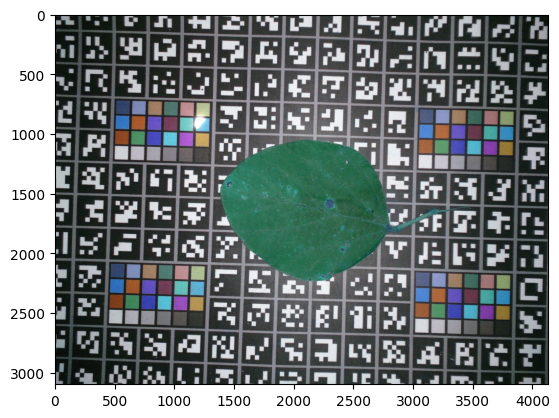

In [6]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [7]:
print(img_array)

[[[176 190 178]
  [145 156 146]
  [130 137 130]
  ...
  [ 84  91  94]
  [  0   0   5]
  [ 38  44  49]]

 [[147 163 152]
  [132 146 135]
  [179 189 183]
  ...
  [ 67  74  77]
  [ 18  24  29]
  [  5  11  16]]

 [[150 167 158]
  [155 172 163]
  [153 168 164]
  ...
  [ 58  63  64]
  [  0   5   8]
  [  0   4   7]]

 ...

 [[129 134 135]
  [124 131 134]
  [169 180 184]
  ...
  [ 43  66  62]
  [ 65  86  87]
  [  6  27  28]]

 [[ 97 109 111]
  [155 164 167]
  [139 147 147]
  ...
  [ 36  57  54]
  [ 60  80  81]
  [ 15  35  36]]

 [[148 161 163]
  [151 163 163]
  [150 155 156]
  ...
  [ 31  52  49]
  [ 89 109 110]
  [ 31  51  52]]]


In [8]:
print(img_array.shape)

(3096, 4128, 3)


In [9]:
IMG_SIZE = 32

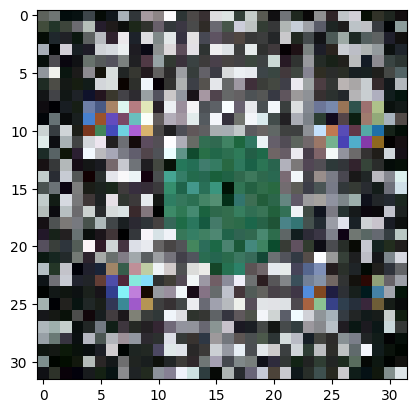

In [10]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print (e)
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()


100%|██████████| 44/44 [00:42<00:00,  1.04it/s]


In [12]:
print(len(training_data))

9420


In [13]:
import random

random.shuffle(training_data)
# Our training_data is a list, meaning it's mutable, so it's now nicely shuffled. We can confirm this by iterating
# over a few of the initial samples and printing out the class.

for sample in training_data[:10]:
    print(sample[1])

0
5
6
6
3
3
3
6
5
3


In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [15]:
y.shape

(9420,)

In [16]:
print(y)

[0 5 6 ... 3 3 6]


In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
# We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# X_train.shape
y_train.shape

(6311,)

In [20]:
num_classes = 8
input_shape = (32, 32, 3)

# (x_train, y_train), (x_test, y_test) = (X_train, y_train), (X_test, y_test)
X_train, X_test = X_train / 255.0, X_test / 255.0
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[i])
# plt.show()

x_train shape: (6311, 32, 32, 3) - y_train shape: (6311, 1)
x_test shape: (3109, 32, 32, 3) - y_test shape: (3109, 1)


In [ ]:
SWIN

In [39]:
patch_size = (2, 2)  # 2-by-2 sized patches
dropout_rate = 0.03  # Dropout rate
num_heads = 8  # Attention heads
embed_dim = 64  # Embedding dimension
num_mlp = 256  # MLP layer size
qkv_bias = True  # Convert embedded patches to query, key, and values with a learnable additive value
window_size = 2  # Size of attention window
shift_size = 1  # Size of shifting window
image_dimension = 32  # Initial image size

num_patch_x = input_shape[0] // patch_size[0]
num_patch_y = input_shape[1] // patch_size[1]

learning_rate = 1e-3
batch_size = 32
num_epochs = 100
validation_split = 0.1
weight_decay = 0.0001
label_smoothing = 0.2

In [40]:
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        x, shape=(-1, patch_num_y, window_size, patch_num_x, window_size, channels)
    )
    x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, shape=(-1, window_size, window_size, channels))
    return windows


def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        windows,
        shape=(-1, patch_num_y, patch_num_x, window_size, window_size, channels),
    )
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, shape=(-1, height, width, channels))
    return x


class DropPath(layers.Layer):
    def __init__(self, drop_prob=None, **kwargs):
        super(DropPath, self).__init__(**kwargs)
        self.drop_prob = drop_prob

    def call(self, x):
        input_shape = tf.shape(x)
        batch_size = input_shape[0]
        rank = x.shape.rank
        shape = (batch_size,) + (1,) * (rank - 1)
        random_tensor = (1 - self.drop_prob) + tf.random.uniform(shape, dtype=x.dtype)
        path_mask = tf.floor(random_tensor)
        output = tf.math.divide(x, 1 - self.drop_prob) * path_mask
        return output

In [41]:
class WindowAttention(layers.Layer):
    def __init__(
        self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs
    ):
        super(WindowAttention, self).__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)

    def build(self, input_shape):
        num_window_elements = (2 * self.window_size[0] - 1) * (
            2 * self.window_size[1] - 1
        )
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=tf.initializers.Zeros(),
            trainable=True,
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords_matrix = np.meshgrid(coords_h, coords_w, indexing="ij")
        coords = np.stack(coords_matrix)
        coords_flatten = coords.reshape(2, -1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.transpose([1, 2, 0])
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)

        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index), trainable=False
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k

        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(
            self.relative_position_index, shape=(-1,)
        )
        relative_position_bias = tf.gather(
            self.relative_position_bias_table, relative_position_index_flat
        )
        relative_position_bias = tf.reshape(
            relative_position_bias, shape=(num_window_elements, num_window_elements, -1)
        )
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)

        if mask is not None:
            nW = mask.get_shape()[0]
            mask_float = tf.cast(
                tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32
            )
            attn = (
                tf.reshape(attn, shape=(-1, nW, self.num_heads, size, size))
                + mask_float
            )
            attn = tf.reshape(attn, shape=(-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)

        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

In [42]:

class SwinTransformer(layers.Layer):
    def __init__(
        self,
        dim,
        num_patch,
        num_heads,
        window_size=7,
        shift_size=0,
        num_mlp=1024,
        qkv_bias=True,
        dropout_rate=0.0,
        **kwargs,
    ):
        super(SwinTransformer, self).__init__(**kwargs)

        self.dim = dim  # number of input dimensions
        self.num_patch = num_patch  # number of embedded patches
        self.num_heads = num_heads  # number of attention heads
        self.window_size = window_size  # size of window
        self.shift_size = shift_size  # size of window shift
        self.num_mlp = num_mlp  # number of MLP nodes

        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = DropPath(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        self.mlp = keras.Sequential(
            [
                layers.Dense(num_mlp),
                layers.Activation(keras.activations.gelu),
                layers.Dropout(dropout_rate),
                layers.Dense(dim),
                layers.Dropout(dropout_rate),
            ]
        )

        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            w_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)

            # mask array to windows
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(
                mask_windows, shape=[-1, self.window_size * self.window_size]
            )
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(
                mask_windows, axis=2
            )
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(initial_value=attn_mask, trainable=False)

    def call(self, x):
        height, width = self.num_patch
        _, num_patches_before, channels = x.shape
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, shape=(-1, height, width, channels))
        if self.shift_size > 0:
            shifted_x = tf.roll(
                x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2]
            )
        else:
            shifted_x = x

        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(
            x_windows, shape=(-1, self.window_size * self.window_size, channels)
        )
        attn_windows = self.attn(x_windows, mask=self.attn_mask)

        attn_windows = tf.reshape(
            attn_windows, shape=(-1, self.window_size, self.window_size, channels)
        )
        shifted_x = window_reverse(
            attn_windows, self.window_size, height, width, channels
        )
        if self.shift_size > 0:
            x = tf.roll(
                shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2]
            )
        else:
            x = shifted_x

        x = tf.reshape(x, shape=(-1, height * width, channels))
        x = self.drop_path(x)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = self.drop_path(x)
        x = x_skip + x
        return x


In [43]:

class PatchExtract(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(PatchExtract, self).__init__(**kwargs)
        self.patch_size_x = patch_size[0]
        self.patch_size_y = patch_size[0]

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=(1, self.patch_size_x, self.patch_size_y, 1),
            strides=(1, self.patch_size_x, self.patch_size_y, 1),
            rates=(1, 1, 1, 1),
            padding="VALID",
        )
        patch_dim = patches.shape[-1]
        patch_num = patches.shape[1]
        return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))


class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super(PatchEmbedding, self).__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)

    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch, delta=1)
        return self.proj(patch) + self.pos_embed(pos)


class PatchMerging(tf.keras.layers.Layer):
    def __init__(self, num_patch, embed_dim):
        super(PatchMerging, self).__init__()
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)

    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.get_shape().as_list()
        x = tf.reshape(x, shape=(-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat((x0, x1, x2, x3), axis=-1)
        x = tf.reshape(x, shape=(-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)


In [44]:
class FNetLayer(layers.Layer):
    def __init__(self, num_patches, embedding_dim, dropout_rate, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.ffn = keras.Sequential(
            [
                layers.Dense(units=embedding_dim),
                tfa.layers.GELU(),
                layers.Dropout(rate=dropout_rate),
                layers.Dense(units=embedding_dim),
            ]
        )

        self.normalize1 = layers.LayerNormalization(epsilon=1e-6)
        self.normalize2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs):
        # Apply fourier transformations.
        x = tf.cast(
            tf.signal.fft2d(tf.cast(inputs, dtype=tf.dtypes.complex64)),
            dtype=tf.dtypes.float32,
        )
        # Add skip connection.
        x = x + inputs
        # Apply layer normalization.
        x = self.normalize1(x)
        # Apply Feedfowrad network.
        x_ffn = self.ffn(x)
        # Add skip connection.
        x = x + x_ffn
        # Apply layer normalization.
        return self.normalize2(x)

In [45]:
# Define the gMLPLayer class
class gMLPLayer(layers.Layer):
    def __init__(self, num_patches, embedding_dim, dropout_rate, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.channel_projection1 = keras.Sequential(
            [
                layers.Dense(units=embedding_dim * 2),
                tfa.layers.GELU(),
                layers.Dropout(rate=dropout_rate),
            ]
        )

        self.channel_projection2 = layers.Dense(units=embedding_dim)

        self.spatial_projection = layers.Dense(
            units=num_patches, bias_initializer="Ones"
        )

        self.normalize1 = layers.LayerNormalization(epsilon=1e-6)
        self.normalize2 = layers.LayerNormalization(epsilon=1e-6)

    def spatial_gating_unit(self, x):
        # Split x along the channel dimensions.
        # Tensors u and v will be in the shape of [batch_size, num_patches, embedding_dim].
        u, v = tf.split(x, num_or_size_splits=2, axis=2)
        # Apply layer normalization.
        v = self.normalize2(v)
        # Apply spatial projection.
        v_channels = tf.linalg.matrix_transpose(v)
        v_projected = self.spatial_projection(v_channels)
        v_projected = tf.linalg.matrix_transpose(v_projected)
        # Apply element-wise multiplication.
        return u * v_projected

    def call(self, inputs):
        # Apply layer normalization.
        x = self.normalize1(inputs)
        # Apply the first channel projection. x_projected shape: [batch_size, num_patches, embedding_dim * 2].
        x_projected = self.channel_projection1(x)
        # Apply the spatial gating unit. x_spatial shape: [batch_size, num_patches, embedding_dim].
        x_spatial = self.spatial_gating_unit(x_projected)
        # Apply the second channel projection. x_projected shape: [batch_size, num_patches, embedding_dim].
        x_projected = self.channel_projection2(x_spatial)
        # Add skip connection.
        return x + x_projected

In [50]:
class gMLPLayer(layers.Layer):
    def __init__(self, num_patches, embedding_dim, dropout_rate, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.channel_projection1 = keras.Sequential(
            [
                layers.Dense(units=embedding_dim * 2),
                tfa.layers.GELU(),
                layers.Dropout(rate=dropout_rate),
            ]
        )

        self.channel_projection2 = layers.Dense(units=embedding_dim)

        self.spatial_projection = layers.Dense(
            units=num_patches, bias_initializer="Ones"
        )

        self.normalize1 = layers.LayerNormalization(epsilon=1e-6)
        self.normalize2 = layers.LayerNormalization(epsilon=1e-6)

    def spatial_gating_unit(self, x):
        # Split x along the channel dimensions.
        # Tensors u and v will be in the shape of [batch_size, num_patches, embedding_dim].
        u, v = tf.split(x, num_or_size_splits=2, axis=2)
        # Apply layer normalization.
        v = self.normalize2(v)
        # Apply spatial projection.
        v_channels = tf.linalg.matrix_transpose(v)
        v_projected = self.spatial_projection(v_channels)
        v_projected = tf.linalg.matrix_transpose(v_projected)
        # Apply element-wise multiplication.
        return u * v_projected

    def call(self, inputs):
        # Apply layer normalization.
        x = self.normalize1(inputs)
        # Apply the first channel projection. x_projected shape: [batch_size, num_patches, embedding_dim * 2].
        x_projected = self.channel_projection1(x)
        # Apply the spatial gating unit. x_spatial shape: [batch_size, num_patches, embedding_dim].
        x_spatial = self.spatial_gating_unit(x_projected)
        # Apply the second channel projection. x_projected shape: [batch_size, num_patches, embedding_dim].
        x_projected = self.channel_projection2(x_spatial)
        # Add skip connection.
        return x + x_projected

    def compute_output_shape(self, input_shape):
        # Adjust the output shape to match the number of patches or embedding dimensions
        return input_shape[:2] + (input_shape[2],)

In [51]:
# Apply the gMLPLayer to the FNetLayer output
gmlp_output = gMLPLayer(num_patches=num_patch_x * num_patch_y, embedding_dim=embed_dim, dropout_rate=dropout_rate)(fnet_output)

# Print the output shape of gmlp_output
print("gMLPLayer Output Shape:", gmlp_output.shape)


gMLPLayer Output Shape: (None, 256, 64)


In [52]:
# Rest of your code
input = layers.Input(input_shape)
x = layers.RandomCrop(image_dimension, image_dimension)(input)
x = layers.RandomFlip("horizontal")(x)
x = PatchExtract(patch_size)(x)
x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)

# Apply the FNetLayer to the PatchEmbedding output
fnet_output = FNetLayer(num_patches=num_patch_x * num_patch_y, embedding_dim=embed_dim, dropout_rate=dropout_rate)(x)

# Create SwinTransformer layers (assuming you have SwinTransformer class)
swin_layer1 = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=0,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(fnet_output)

swin_layer2 = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=shift_size,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(swin_layer1)

# Rest of your code
x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim)(swin_layer2)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(8, activation="softmax")(x)

In [55]:
# Print the model summary for debugging
model = keras.Model(input, output)
model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 random_crop_5 (RandomCrop)  (None, 32, 32, 3)         0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 patch_extract_5 (PatchExtr  (None, 256, 12)           0         
 act)                                                            
                                                                 
 patch_embedding_5 (PatchEm  (None, 256, 64)           17216     
 bedding)                                                        
                                                                 
 f_net_layer_5 (FNetLayer)   (None, 256, 64)           8576

In [47]:
# Modify the final output layer to have the correct number of units (num_classes)
num_classes = 8  # Replace with the actual number of classes in your dataset
output = layers.Dense(num_classes, activation="softmax")(swin_layer2)


In [53]:
# Define the input layer
input = layers.Input(input_shape)

# Data Augmentation
x = layers.RandomCrop(image_dimension, image_dimension)(input)
x = layers.RandomFlip("horizontal")(x)

# Extract patches and apply patch embedding
x = PatchExtract(patch_size)(x)
x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)

# Apply the FNetLayer to the PatchEmbedding output
fnet_output = FNetLayer(num_patches=num_patch_x * num_patch_y, embedding_dim=embed_dim, dropout_rate=dropout_rate)(x)

# Apply the gMLPLayer to the FNetLayer output
gmlp_output = gMLPLayer(num_patches=num_patch_x * num_patch_y, embedding_dim=embed_dim, dropout_rate=dropout_rate)(fnet_output)

# Create SwinTransformer layers
swin_layer1 = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=0,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(gmlp_output)

swin_layer2 = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=shift_size,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(swin_layer1)

# Rest of your code
# ...

# Define the final output layer for classification (adjust the number of output units as needed)
output = layers.Dense(8, activation="softmax")(swin_layer2)

In [ ]:
import os

# Replace 'dataset_path' with the path to your dataset directory
dataset_path = '/content/drive/MyDrive/tea-data-pre/train'
num_classes = len(os.listdir(dataset_path))

print("Number of classes:", num_classes)


Number of classes: 6


In [32]:
# import tensorflow as tf

# # Assuming X_train and y_train are your original input data and labels
# # Resize X_train images to match the expected input shape (32, 32)
resized_images = tf.image.resize(X_train, size=(32, 32))


In [56]:
import tensorflow as tf

# Define your model architecture
# ...

# Convert y_train to one-hot encoded format
num_classes = 8 # Replace with the actual number of classes in your dataset
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
model = keras.Model(input, output)

# Compile the model
model.compile(
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing),
    optimizer=tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    ),
    metrics=[
        keras.metrics.CategoricalAccuracy(name="accuracy"),
        keras.metrics.TopKCategoricalAccuracy(3, name="top-5-accuracy"),
    ],
)

# Train the model using the resized images and one-hot encoded labels
history = model.fit(
   X_train,
   y_train_encoded,
    batch_size=batch_size,
    epochs=50,
    validation_split=validation_split
)


Epoch 1/50


ValueError: ignored

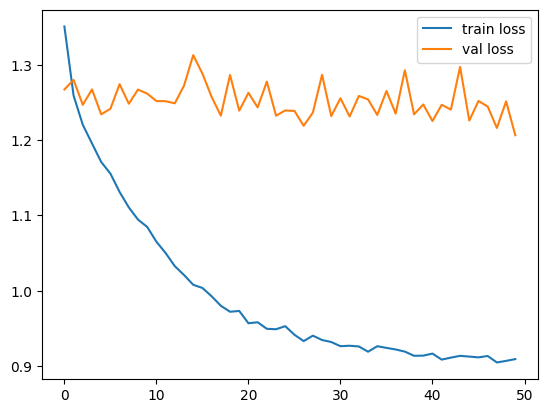

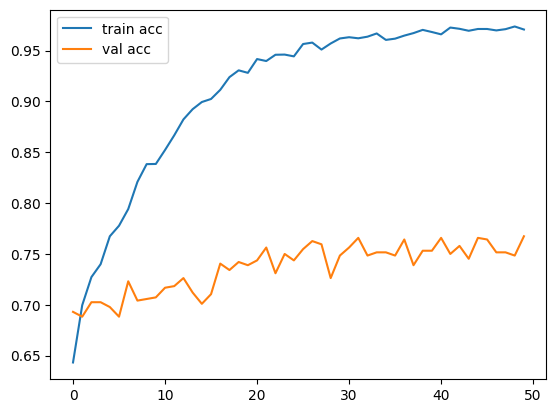

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
y_pred = model.predict(X_train)


198/198 [==============================] - 33s 162ms/step


In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)


In [ ]:
cm = confusion_matrix(y_train, y_pred_labels)


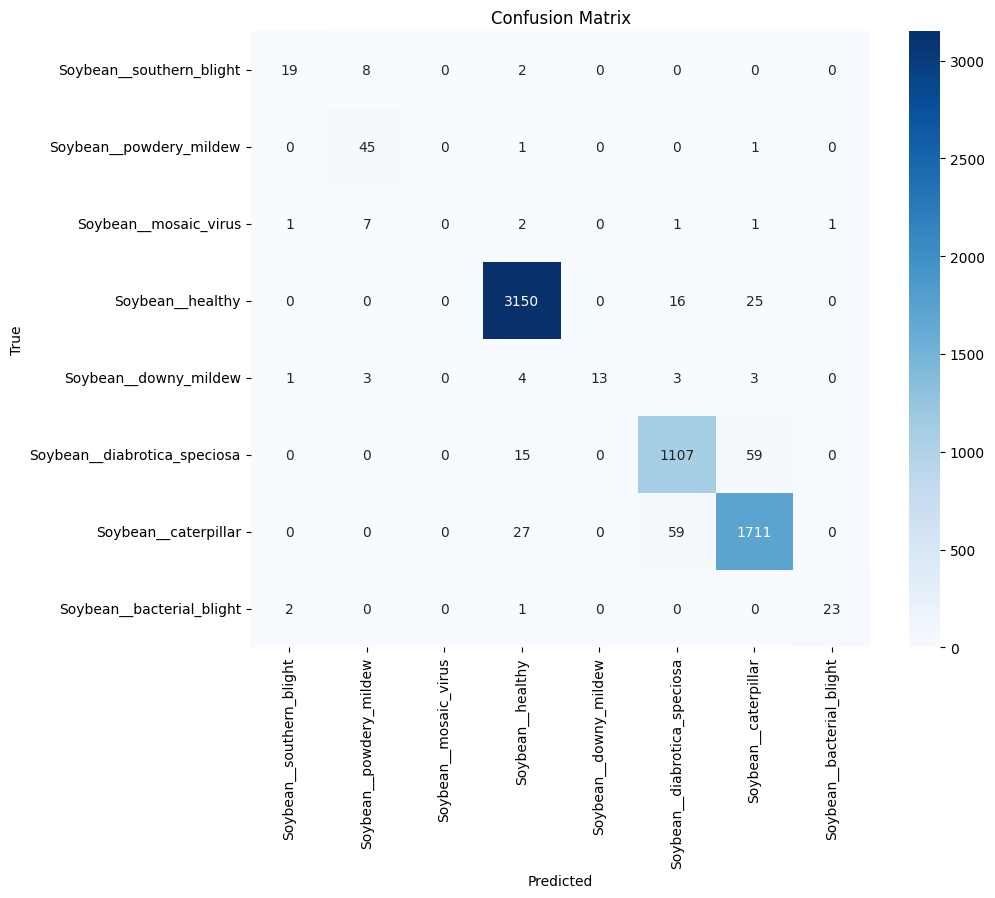

In [ ]:
class_names = ["Soybean__southern_blight", "Soybean__powdery_mildew","Soybean__mosaic_virus","Soybean__healthy","Soybean__downy_mildew","Soybean__diabrotica_speciosa","Soybean__caterpillar","Soybean__bacterial_blight"]  # Replace with your actual class names

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_train, y_pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
                               precision    recall  f1-score   support

    Soybean__southern_blight       0.83      0.66      0.73        29
     Soybean__powdery_mildew       0.71      0.96      0.82        47
       Soybean__mosaic_virus       0.00      0.00      0.00        13
            Soybean__healthy       0.98      0.99      0.99      3191
       Soybean__downy_mildew       1.00      0.48      0.65        27
Soybean__diabrotica_speciosa       0.93      0.94      0.94      1181
        Soybean__caterpillar       0.95      0.95      0.95      1797
   Soybean__bacterial_blight       0.96      0.88      0.92        26

                    accuracy                           0.96      6311
                   macro avg       0.80      0.73      0.75      6311
                weighted avg       0.96      0.96      0.96      6311



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


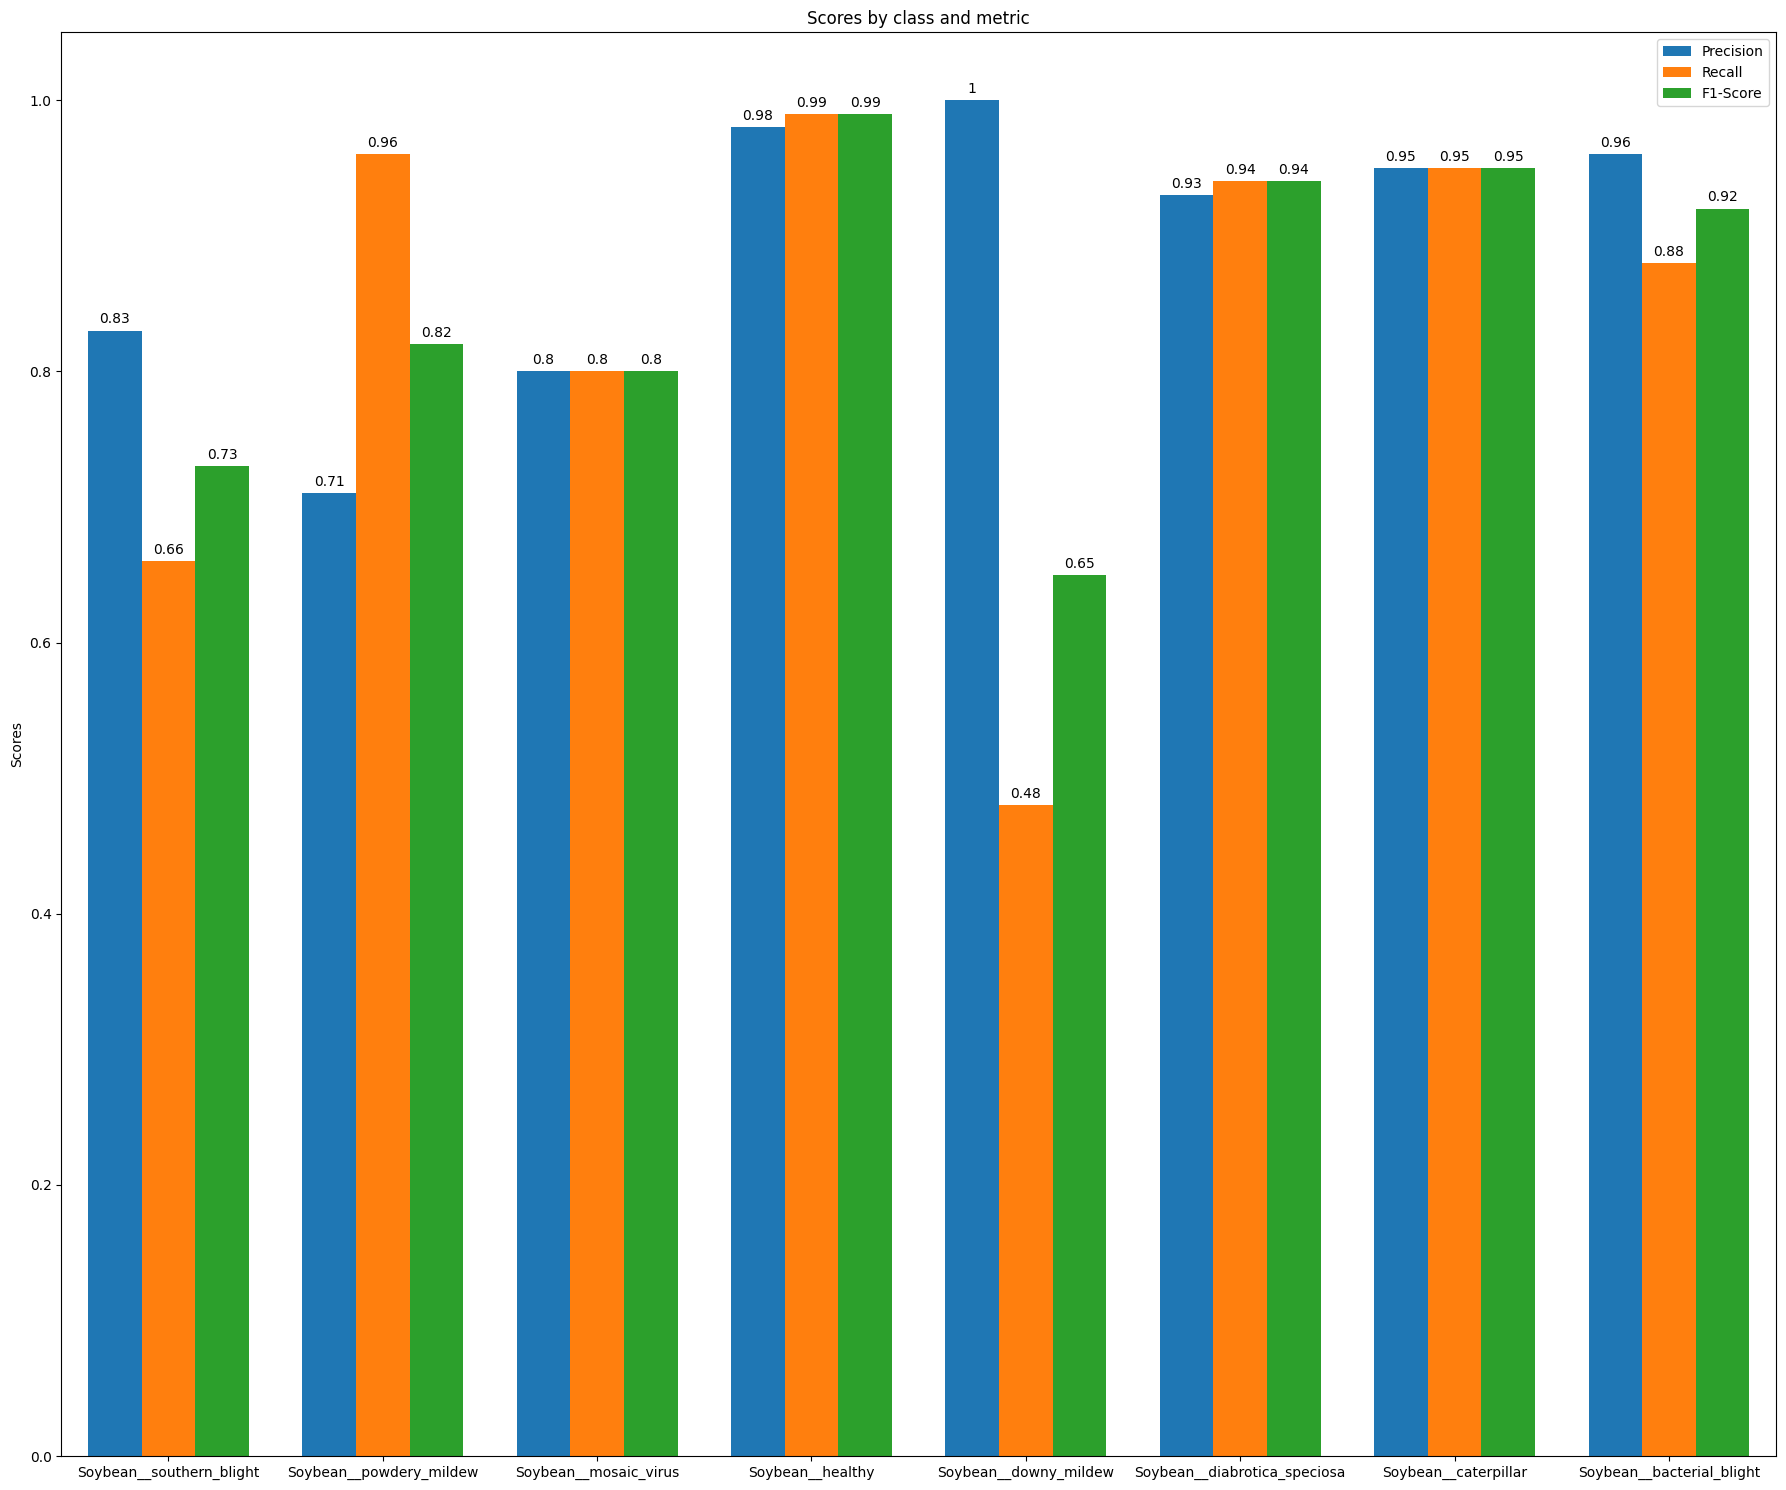

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example class names
class_names = ["Soybean__southern_blight", "Soybean__powdery_mildew","Soybean__mosaic_virus","Soybean__healthy","Soybean__downy_mildew","Soybean__diabrotica_speciosa","Soybean__caterpillar","Soybean__bacterial_blight"]

# Example scores (precision, recall, F1-score)
precision = [0.83,   0.71  , 0.80,  0.98 ,  1.00  ,  0.93, 0.95,0.96  ]
recall = [0.66,  0.96  ,0.80  ,   0.99   , 0.48, 0.94 ,0.95, 0.88]
f1_score = [  0.73 , 0.82  , 0.80  , 0.99 ,   0.65 , 0.94 , 0.95, 0.92  ]

x = np.arange(len(class_names))  # the label locations
width = 0.25  # the width of the bars

# Increase the height of the figure
fig, ax = plt.subplots(figsize=(18, 15))  # Adjust the figsize as needed

rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by class and metric')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

# Adjust the x-axis limits to make space for labels
ax.set_xlim(-width * 2, len(x) - 1 + width * 2)

# Position the x-axis labels below the bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ["Soybean__southern_blight", "Soybean__powdery_mildew","Soybean__mosaic_virus","Soybean__healthy","Soybean__downy_mildew","Soybean__diabrotica_speciosa","Soybean__caterpillar","Soybean__bacterial_blight"]

# Convert class labels to strings
class_labels = [str(label) for label in class_labels]

# Make predictions on the test set
# y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred
y_true_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Generate classification report
report_df = classification_report(y_true_classes, y_pred_classes, target_names=class_labels, output_dict=True)

# Convert the report to a DataFrame
report = pd.DataFrame(report_df).transpose()

# Remove the support column from the DataFrame
report.drop('support', axis=1, inplace=True)

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report.iloc[:-1, :].astype(float), annot=True, cmap="Reds")
plt.title('Classification Report (Combined Model)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


ValueError: ignored

In [ ]:
# Assuming y_preds is 1-dimensional
y_pred = y_pred.reshape(-1, n_classes)

# Similarly, make sure y_test_bin is already in the correct shape
# If not, you might need to reshape it as well


ValueError: ignored

In [ ]:
# Example: Calculate micro-averaged ROC curve and AUC
micro_fpr, micro_tpr, _ = roc_curve(y_true, y_pred_micro)
micro_auc = auc(micro_fpr, micro_tpr)

# Example: Calculate macro-averaged ROC curve and AUC
macro_fpr = np.linspace(0, 1, 100)
macro_tpr = np.zeros_like(macro_fpr)
for i in range(len(class_names)):
    macro_tpr += np.interp(macro_fpr, fpr[i], tpr[i])
macro_tpr /= len(class_names)
macro_auc = auc(macro_fpr, macro_tpr)

# Plot micro and macro averaged ROC curves
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(micro_fpr, micro_tpr, label=f'Micro-Avg ROC (AUC = {micro_auc:.2f})')
ax.plot(macro_fpr, macro_tpr, label=f'Macro-Avg ROC (AUC = {macro_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Micro and Macro Averaged ROC Curves for Multi-Class')
ax.legend(loc="lower right")

plt.show()


NameError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Example: Convert class labels to binary format
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3,4])  # Replace [0, 1, 2, 3] with your class labels

# Example: Compute ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Example: Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class')
plt.legend(loc="lower right")
plt.show()


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


22/22 [==============================] - 0s 15ms/step


ValueError: ignored

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import roc_curve, auc

# # Example class names
# class_names = ['Wheat__yellow_rust', 'Wheat__septoria', 'Wheat__healthy', 'Wheat__brown_rust']

# # Example scores (precision, recall, F1-score)
# precision = [0.98, 0.92, 0.96, 0.96]
# recall = [0.93, 1.00, 0.99, 0.97]
# f1_score = [0.96, 0.96, 0.98, 0.97]

# x = np.arange(len(class_names))  # the label locations
# width = 0.25  # the width of the bars

# # Increase the height of the figure
# fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the figsize as needed

# rects1 = ax.bar(x - width, precision, width, label='Precision')
# rects2 = ax.bar(x, recall, width, label='Recall')
# rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by class and metric')
# ax.set_xticks(x)
# ax.set_xticklabels(class_names)
# ax.legend()

# # Adjust the x-axis limits to make space for labels
# ax.set_xlim(-width * 2, len(x) - 1 + width * 2)

# # Position the x-axis labels below the bars
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)

# fig.tight_layout()

# plt.show()

# # Example ROC curve generation
# # Generate random scores for binary classification (replace with your actual scores)
# np.random.seed(42)
# n_samples = 100
# y_true = np.random.randint(2, size=n_samples)
# y_scores = np.random.rand(n_samples)

# # Compute ROC curve and ROC area for each class
# fpr, tpr, _ = roc_curve(y_true, y_scores)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import roc_curve, auc

# # Example class names
# class_names = ['Wheat__yellow_rust', 'Wheat__septoria', 'Wheat__healthy', 'Wheat__brown_rust']

# # Example scores (precision, recall, F1-score)
# precision = [0.98,  0.92,  0.96, 0.96]
# recall = [0.93,  1.00 , 0.99 , 0.97]
# f1_score = [0.96, 0.96, 0.98 , 0.97]

# # Example ROC curve data
# false_positive_rate = [0.05, 0.1, 0.2, 0.15]  # Example values
# true_positive_rate = [0.95, 0.9, 0.8, 0.85]  # Example values

# x = np.arange(len(class_names))  # the label locations
# width = 0.25  # the width of the bars

# # Increase the height of the figure
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))  # Adjust the figsize as needed

# rects1 = ax1.bar(x - width, precision, width, label='Precision')
# rects2 = ax1.bar(x, recall, width, label='Recall')
# rects3 = ax1.bar(x + width, f1_score, width, label='F1-Score')

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax1.set_ylabel('Scores')
# ax1.set_title('Scores by class and metric')
# ax1.set_xticks(x)
# ax1.set_xticklabels(class_names)
# ax1.legend()

# # Adjust the x-axis limits to make space for labels
# ax1.set_xlim(-width * 2, len(x) - 1 + width * 2)

# # Position the x-axis labels below the bars
# ax1.bar_label(rects1, padding=3)
# ax1.bar_label(rects2, padding=3)
# ax1.bar_label(rects3, padding=3)

# # ROC Curves
# for i, class_name in enumerate(class_names):
#     fpr = false_positive_rate[i]
#     tpr = true_positive_rate[i]
#     roc_auc = auc(fpr, tpr)
#     ax2.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# ax2.set_xlim([0.0, 1.0])
# ax2.set_ylim([0.0, 1.05])
# ax2.set_xlabel('False Positive Rate')
# ax2.set_ylabel('True Positive Rate')
# ax2.set_title('Receiver Operating Characteristic')
# ax2.legend(loc="lower right")

# fig.tight_layout()

# plt.show()
